### R,G,B 컬러이미지(CIFAR-10) 데이터 이용
비행기, 자동차, 새, 고양이, 사슴, 개, 개구리, 말, 배, 트럭 10개의 클래스로 구성  
클래스 별 5000장의 학습데이터셋, 1000장의 검증 데이터셋  
총 5만장의 학습데이터셋, 1만장의 검증 데이터셋

In [1]:
''' 1. module import'''
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [2]:
''' 2. 딥러닝 모델을설계할 때 활용하는 장비 확인'''
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
    
print('Using PyTorch version:', torch.__version__, 'Device:', DEVICE)
# Using PyTorch version: 1.4.0 Device: cuda => GPU 이용

Using PyTorch version: 1.4.0 Device: cuda


In [3]:
BATCH_SIZE = 32 #미니배치 1개당 32개의 데이터로 구성
#미니배치를 통해 학습하는 횟수 : 'Iteration'
#전체 데이터를 이용해 학습을 진행한 횟수 :'Epoch'
EPOCHS = 10

In [4]:
''' 3. CIFAR10 데이터 다운로드(train, test set 분리)'''
train_dataset = datasets.CIFAR10(root = '../data/CIFAR_10',
                              train=True,
                              download=True,
                              transform = transforms.ToTensor())
test_dataset = datasets.CIFAR10(root = '../data/CIFAR_10',
                              train=False,
                              transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle=False)

Files already downloaded and verified


## 4-3. Augmentation

In [5]:
''' 3. Data Augmentation이 적용된 CIFAR10 데이터 다운로드(train, test set 분리)'''
train_dataset = datasets.CIFAR10(root = '../data/CIFAR_10',
                              train=True,
                              download=True,
                              transform = transforms.Compose([ #Compose는 이미지 데이터 전처리 및 augmentation을 다양하게 적용
                                  transforms.RandomHorizontalFlip(), #해당 이미지를 50%확률로 좌우 반전
                                  transforms.ToTensor(),#0~1사이의 값으로 정규화.모델의 input으로 이용되도록 tensor로 변환하는 전처리과정
                                  transforms.Normalize((0.5,0.5,0.5),#totensor형태로 전환된 이미지에 대해 또 다른 정규화 진행
                                                       #정규화를 진행할 때 r,g,b순으로 평균을 0.5씩 적용
                                                       (0.5,0.5,0.5))]))#정규화를 진행할 때 r,g,b순으로 표준편차를 0.5씩 적용
test_dataset = datasets.CIFAR10(root = '../data/CIFAR_10',
                              train=False,
                              transform = transforms.Compose([
                                  transforms.RandomHorizontalFlip(),
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.5,0.5,0.5),
                                                       (0.5,0.5,0.5))]))

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle=False)

Files already downloaded and verified


In [6]:
''' 4. 데이터 확인(1)'''
for (x_train, y_train) in train_loader:
    print('x_train:', x_train.size(), 'type:', x_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    print(x_train, y_train)
    break
    
# x_train: torch.Size([32, 3, 32, 32]) type: torch.FloatTensor
# [mini-batch, channel, height, width]

x_train: torch.Size([32, 3, 32, 32]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor
tensor([[[[ 0.4039,  0.4510,  0.7490,  ...,  0.7020,  0.8196,  0.8510],
          [ 0.1373,  0.1451,  0.4431,  ...,  0.2392,  0.2941,  0.3255],
          [ 0.1373,  0.0824,  0.2392,  ...,  0.1451,  0.0745,  0.1059],
          ...,
          [-0.2078, -0.1451, -0.1529,  ..., -0.2471, -0.2078, -0.1686],
          [-0.1451, -0.0980, -0.1294,  ..., -0.1922, -0.2157, -0.2078],
          [-0.0667, -0.1059, -0.1137,  ..., -0.1686, -0.3176, -0.2000]],

         [[ 0.6157,  0.6392,  0.8745,  ...,  0.8039,  0.8980,  0.9059],
          [ 0.3882,  0.3804,  0.6392,  ...,  0.4824,  0.5216,  0.5294],
          [ 0.3804,  0.3255,  0.4588,  ...,  0.3882,  0.3255,  0.3412],
          ...,
          [-0.0353,  0.0510,  0.0275,  ..., -0.0353, -0.0275,  0.0196],
          [ 0.0588,  0.0902,  0.0353,  ...,  0.0196, -0.0118,  0.0196],
          [ 0.1373,  0.0745,  0.0588,  ..., -0.0118, -0.1451,  0.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

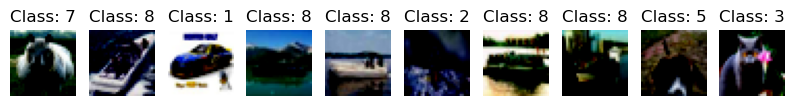

In [7]:
''' 5. 데이터 확인(2)'''
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))
for i in range(10):
    plt.subplot(1,10,i+1) #(nrows,ncols,index)
    plt.axis('off')
    plt.imshow(np.transpose(x_train[i],(1,2,0)))#괄호 안의 숫자를 조정하여 사용자가 한번에 여러 축을 바꿔서 사용할 수 있는 기능
    #([1],[2],[0])차원으로 바꿔라 
    # => torch.Size([32, 3, 32, 32])에서 torch.Size([32, 32, 3])로 transpose
    plt.title('Class: ' + str(y_train[i].item()))

In [70]:
x_train.shape
# torch.Size([32, 3, 32, 32]) : [mini-batch, channel, height, width]

torch.Size([32, 3, 32, 32])

In [68]:
tr = np.transpose(x_train[i],(1,2,0))

In [69]:
tr.shape

torch.Size([32, 32, 3])

## 4-1. MLP

In [7]:
''' 6. MLP모델 설계'''
class Net(nn.Module): #nn.Module클래스를 상속받는 Net클래스 정의
    def __init__(self): #Net인스턴스 생성했을 대 지니게 되는 성질 정의
        super(Net, self).__init__() #nn.Module내에 있는 메스드 상속받아 이용
        self.fc1 = nn.Linear(32*32*3, 512) #첫번째 fully connected layer 정의, (가로픽셀*세로픽셀*채널수)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        
    def forward(self, x): 
        # MLP모델은 1차원의 벡터 값을 입력으로 받을 수 있다. 그러나 CIFAR-10은 32*32*3크기의 2차원 데이터
        # 2차원->1차원 => view메서드 이용해여 32*32*3크기의 1차원 데이터로 변환해 진행
        # 2차원의 데이터를 1차원으로 펼친다. flatten
        x = x.view(-1,32*32*3) 
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x

In [ ]:
''' 7. Optimizer, Object Function 설정'''
model = Net().to(DEVICE)
# 역전파를 이용해 파라미터를 업데이터 할 대 이용하는 optimizer를 정의
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

print(model)

## 4-2. CNN

In [34]:
''' 6. CNN모델 설계'''
class CNN(nn.Module): #nn.Module클래스를 상속받는 Net클래스 정의
    def __init__(self): #Net인스턴스 생성했을 대 지니게 되는 성질 정의
        super(CNN, self).__init__() #nn.Module내에 있는 메스드 상속받아 이용
        self.conv1 = nn.Conv2d( #2차원의 이미지 데이터를 nn.Conv2d메서드를 이용해 Convolution연산을 하는 필터 정의
            in_channels = 3, #이미지 채널수와 동일하게 채널수를 3
            out_channels = 8, #convolution하는 필터의 개수 설정. 필터개수만큼 output의 깊이가 정해짐. 
            kernel_size = 3,
            padding = 1) #이미지 가장자리와 중앙부분의 convolution연산 횟수 동일하게 맞춰주기
        self.conv2 = nn.Conv2d(
            in_channels = 8,
            out_channels = 16,
            kernel_size = 3,
            padding = 1)
        self.pool = nn.MaxPool2d(
            kernel_size = 2,
            stride = 2)
        
        #self.conv1, self.conv2연산을 통해 나온 결과를 바탕으로 8*8*16크기의 피처맵으로 생성
        #MLP의 input으로 이용하기 위해 8*8*16크기의 1차원 데이터로 펼쳐 이용
        self.fc1 = nn.Linear(8*8*16, 64) 
        self.fc2 = nn.Linear(64,32)
        self.fc3 = nn.Linear(32,10)
        
    #forward propagation정의
    def forward(self, x): 
        x = self.conv1(x) #convolution연산을 진행하여 feature map 생성
        x = F.relu(x)
        x = self.pool(x) #max pooling을 진행해 생성된 피처맵 다운샘플링
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        
        x = x.view(-1, 8*8*16) #최종 생성된 feature map은 8*8*16크기.이를 펼치기 위해 view로 피처맵을 1차원 데이터로 변환
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x

In [35]:
''' 7. Optimizer, Object Function 설정'''
model = CNN().to(DEVICE)
# 역전파를 이용해 파라미터를 업데이터 할 대 이용하는 optimizer를 정의
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

print(model)

CNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)


## 4-4. ResNet

In [8]:
''' 6. ResNet모델 설계'''
class BasicBlock(nn.Module): #resnet모델 내부에 반복적으로 이용하는 block을 바탕으로 구성되어있음.
    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__() 
        #2차원의 이미지 데이터를 convolution연산을 하는 filter정의
        self.conv1 = nn.Conv2d(in_planes, #BasicBlock이 input으로 이용되는 데이터의 채널 수를 의미하는 in_planes값
                               planes,#filter의 개수는 basicblock에서 인자값으로 입력 된 planes값을 통해 filter의 개수가 정해짐.
                               kernel_size=3,
                               stride=stride,
                               padding=1,
                               bias=False)#convolution연산시 이미지의 픽셀, 필터의 파라미터, convolution연산을 한 이후 bias값을 더해줄 것인지 선택하는 옵션
        self.bn1 = nn.BatchNorm2d(planes)#layer마다 input의 분포가 달라짐에 따라 학습속도가 느려지는 것 방지하기 위해 이용되는 기법
        self.conv2 = nn.Conv2d(planes,planes,#planes인자 값을 이용해 filter의 채널 수 정의, planes인자 값을 이용해 filter의 개수를 설정.
                               #self.conv2를 이용해 피처맵 생성했을 때 채널 수의 변화는 없을것이라 예상
                               kernel_size=3,
                               stride = 1,
                               padding=1,
                               bias=False)
        self.bn2 = nn.BatchNorm2d(planes)#init의 input으로 받는 planes크기의 데이터에 대해 적용
        
        self.shortcut = nn.Sequential() #resnet의 특징인 shortcut. 기존의 값과 convolution, batch normalization한 결과 더하는 과정
        if stride != 1 or in_planes != planes:#F(x)와 x의 차원이 다를 때에는 x의 차원을 증가시키기 위해 convolution layer를 사용하여 차원을 맞춰준다.
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes,#2차원의 이미지 데이터를 nn.conv2d메서드를 이용해 convolution연산을 하는 filter정의
                          kernel_size = 1,
                          stride = stride,
                          bias = False),
                nn.BatchNorm2d(planes))        

    def forward(self, x): 
        out = F.relu(self.bn1(self.conv1(x)))#self.conv1을 이용해 채널수가 planes인 피처맵생성하고 self.bn1을 이용해 배치정규화 계산 후 relu에 적용
        out = self.bn2(self.conv2(out)) 
        out += self.shortcut(x) #skip connection
        out = F.relu(out)
        return out
    #여기까지 정의된 내용이 resnet내 반복적으로 연산이 수행되는 residual block을 의미
    
class ResNet(nn.Module):
    def __init__(self, num_classes = 10):
        super(ResNet, self).__init__()
        self.in_planes = 16 #resnet클래스의 인스턴스들은 in_planes값이 자동으로 16으로 고정
        
        #basicblock클래스 내에서 이용하는 self.conv1과 다른 메서드. conv1과는 다른 역할
        #input으로 이용하는 컬러이미지에 적용하는 필터. 필터의 개수는 16으로 정의
        self.conv1 = nn.Conv2d(3,16,
                               kernel_size = 3,
                               stride = 1,
                               padding = 1,
                               bias = False)
        self.bn1 = nn.BatchNorm2d(16) #벡터의 크기가 16인 2차원 데이터에 적용할 수있는 배치정규화 연산 정의
        self.layer1 = self._make_layer(16,2,stride=1)
        self.layer2 = self._make_layer(32,2,stride=2)
        self.layer3 = self._make_layer(64,2,stride=2)#_make_layer메서드를 이용해 생성한 레이어를 세번째 레이어로 설정
        self.linear = nn.Linear(64, num_classes)#세번째 레이어의 input이 64, 최종출력값은 10개의 클래스
        #원핫인코딩으로 표현된 벡터값과 loss를 계산해야하므로 출력값의 크기를 10으로 설정
        
    def _make_layer(self, planes, num_blocks, stride):
        strides = [stride] + [1] *(num_blocks - 1)
        '''print(strides)
           [1, 1]
           [2, 1]
           [2, 1]'''
        #strides=[1]+[1]*2
        #print(strides) : [1,1,1]
        #각 레이어마다 첫번째 블록에서는 너비와 높이 값을 줄임. 이때마다 stride를 2로 해서 dimension 값을 바꿔줌. 
        #인자값 stride를 이용해 stride범위를 basicblock마다 설정할수 있도록 정의
    
        layers = [] #basicblock을 통해 생성된 결괏값을 추가하기 위해 빈리스트 정의
        for stride in strides:
            layers.append(BasicBlock(self.in_planes, planes, stride)) #basicblock의 결괏값을 리스트에 추가
            self.in_planes = planes #self.in_planes를 매번 업데이트해 basicblock을 새로 생성하기 위해 self.in_planes를 planes값으로 업데이트. 
            #shortcut을 계산하기 위해.
        return nn.Sequential(*layers) #여러층으로 생성한 레이어를 sequential내에 정의해 반환
    
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x))) #채널수가 planes인 피처맵 생성하고, self.bn1을 통해 배치정규화 계산 후 relu적용
        #위에서 생성한 피처맵에 _make_layer메서드를 통해 생성한 첫번째 레이어 통과시킴.
        #16채널을 input으로 받아 16채널을 output으로 계산하는 basicblock2개 생성
        out = self.layer1(out)
        #16채널을 input으로 받아 32채널을 output으로 계산하는 basicblock1개, 32채널을 input으로 받아 32채널을 output으로 계산하는 basicblock1개 생성
        out = self.layer2(out)
        #32채널을 input으로 받아 64채널을 output으로 계산하는 basicblock1개, 64채널을 input으로 받아 64채널을 output으로 계산하는 basicblock1개 생성
        out = self.layer3(out)
        out = F.avg_pool2d(out,8)#피처맵 위에 8*8크기의 필터가 움직이면서 64개의 피처맵값의 평균을 계산해 1개의 피처맵으로 다운샘플링
        out = out.view(out.size(0), -1)#다운샘플링된 피처맵에 대해 1차원의 벡터로 펼쳐줌
        our = self.linear(out)#10크기의 벡터는 데이터의 클래스를 표현하는 원핫인코딩과 비교해 loss를 계산하고 
        #이를 바탕으로 resnet모델을 구성하고 있는 파라미터 값 업데이트
        return out

In [9]:
''' 7. Optimizer, Object Function 설정'''
model = ResNet().to(DEVICE)
# 역전파를 이용해 파라미터를 업데이터 할 대 이용하는 optimizer를 정의
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

print(model)

[1, 1]
[2, 1]
[2, 1]
ResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, 

## 4-5. 대표적인 딥러닝 모델
### pretrained = False

In [8]:
''' 6. 파이토치 내에서 제공하는 ResNet34모델 불러온 후 FC층 추가 및 Output크기 설정'''
import torchvision.models as models
#resnet34모델 불러옴. 모델의 구조만 불러오고, 모델 구조 내에 있는 파라미터는 특정 initializer에서 랜덤으로 샘플링한 값을 이용해 모델 불러오기
model = models.resnet34(pretrained = False)
#resnet34모델에 대해 fc layer구성하는 부분에 접근. in_features :모델의 fc layer의 input에 해당하는 노드 수를 num_ftrs로 저장
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)
model = model.cuda() #model.to(DEVICE)

'''7. Optimizer, Object Function 설정'''
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [9]:
''' 8. MLP모델 학습을 진행하며 학습 데이터에 대한 모델 성능을 확인하는 함수 정의'''
def train(model, train_loader, optimizer, log_interval):
    #MLP모델을 학습상태로 지정
    model.train()
    for batch_idx,(image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        
        # 과거에 이용한 미니배치 내에 있는 이미지데이터와 레이블데이터를 바탕으로 계산된 Loss의 Gradient값이 
        # optimizer에 할당돼 있으므로 optimizer의 gradient를 초기화
        optimizer.zero_grad()
        
        #장비에 할당한 이미지 데이터를 MLP모델의 input으로 이용해 output계산
        output = model(image)
        
        #계산된 output과 장비에 할당된 레이블 데이터를 기존에 정의한 crossentropy를 이용해 loss값 계산
        loss = criterion(output, label)
        
        #loss값을 계산한 결과를 바탕으로 역전파를 이용해 계산된 gradient값을 각 파라미터에 할당
        loss.backward()
        
        #각 파라미터에 할당된 gradient값을 이용해 파라미터값 업데이트
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{}({:.0f}%)]\tTrain Loss: {:.6f}".format(
                Epoch, batch_idx*len(image), len(train_loader.dataset), 100.*batch_idx/len(train_loader), loss.item()))

In [10]:
''' 9. 학습되는 과정 속에서 검증 데이터에 대한 모델 성능을 확인하는 함수 정의'''
def evaluate(model, test_loder): #모델 성능 평가
    #학습 과정 또는 학습이 완료된 MLP모델을 학습 상태가 아닌, 평가 상태로 지정
    model.eval()
    #기존에 정의한 test_loader내의 데이터를 이용해 loss값을 계산하기 위해 test_loss를 0으로 임시설정
    test_loss=0
    
    #학습 과정 속 또는 학습이 완료된 MLP모델이 올바른 class로 분류한 경우를 세기 위해 0으로 임시 설정
    correct=0
    
    #모델 평가단계에서 gradient를 통해 파라미터 값이 업데이트 되는 현상을 방지하기 위해 torch.no_grad()메서드 이용해 gradient흐름 억제
    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            
            #계산된 output과 레이블데이터를 crossentropy를 이용해 loss값을 계산한 결괏값을 test_loss에 더해 업데이트
            test_loss += criterion(output, label).item()
            
            #output값은 크기가 10인 벡터 값. 계산된 벡터 값 내 가장 큰 값인 위치에 대해 해당 위치에 대응하는 클래스로 예측했다고 판단.
            prediction = output.max(1, keepdim = True)[1]
            
            #모델이 최종으로 예측한 클래스의 값(prediction)과 실제 레이블(label)이 의미하는 클래스가 맞으면 correct에 더해 올바르게 예측한 횟수 저장
            correct += prediction.eq(label.view_as(prediction)).sum().item()
            
    #현재까지 계산된 test_loss값을 test_loader내에 존재하는 미니배치 개수만큼 나눠 평균 loss값으로 계산
    test_loss /= len(test_loader.dataset)
    
    #test_loader데이터 중 얼마나 맞췄는지를 계산해 정확도를 계산
    test_accuracy = 100. * correct / len(test_loader.dataset) #len(test_loader.dataset):10000
    return test_loss, test_accuracy

## 4-1. MLP

In [17]:
''' 10. MLP학습을 실행하며 test set의 Reconstruction error 확인'''
for Epoch in range(1, EPOCHS+1):
    train(model, train_loader, optimizer, log_interval=200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f}%\n".format(
    Epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/50000(0%)]	Train Loss: 2.297394
Train Epoch: 1 [6400/50000(13%)]	Train Loss: 2.048347
Train Epoch: 1 [12800/50000(26%)]	Train Loss: 1.851515
Train Epoch: 1 [19200/50000(38%)]	Train Loss: 2.111075
Train Epoch: 1 [25600/50000(51%)]	Train Loss: 1.813437
Train Epoch: 1 [32000/50000(64%)]	Train Loss: 1.881917
Train Epoch: 1 [38400/50000(77%)]	Train Loss: 1.733962
Train Epoch: 1 [44800/50000(90%)]	Train Loss: 1.785382

[EPOCH: 1], 	Test Loss: 0.0536, 	Test Accuracy: 37.78%

Train Epoch: 2 [0/50000(0%)]	Train Loss: 1.634809
Train Epoch: 2 [6400/50000(13%)]	Train Loss: 1.566472
Train Epoch: 2 [12800/50000(26%)]	Train Loss: 1.889022
Train Epoch: 2 [19200/50000(38%)]	Train Loss: 1.716042
Train Epoch: 2 [25600/50000(51%)]	Train Loss: 1.942259
Train Epoch: 2 [32000/50000(64%)]	Train Loss: 1.586412
Train Epoch: 2 [38400/50000(77%)]	Train Loss: 1.590173
Train Epoch: 2 [44800/50000(90%)]	Train Loss: 1.681541

[EPOCH: 2], 	Test Loss: 0.0496, 	Test Accuracy: 43.51%

Train Epoch: 3 [0/

## 4-2. CNN

In [30]:
''' 10. CNN학습을 실행하며 test set의 Reconstruction error 확인'''
for Epoch in range(1, EPOCHS+1):
    train(model, train_loader, optimizer, log_interval=200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f}%\n".format(
    Epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/50000(0%)]	Train Loss: 2.275474
Train Epoch: 1 [6400/50000(13%)]	Train Loss: 1.895518
Train Epoch: 1 [12800/50000(26%)]	Train Loss: 1.837620
Train Epoch: 1 [19200/50000(38%)]	Train Loss: 1.721792
Train Epoch: 1 [25600/50000(51%)]	Train Loss: 1.311059
Train Epoch: 1 [32000/50000(64%)]	Train Loss: 1.458297
Train Epoch: 1 [38400/50000(77%)]	Train Loss: 1.655483
Train Epoch: 1 [44800/50000(90%)]	Train Loss: 1.481384

[EPOCH: 1], 	Test Loss: 0.0451, 	Test Accuracy: 47.96%

Train Epoch: 2 [0/50000(0%)]	Train Loss: 1.537794
Train Epoch: 2 [6400/50000(13%)]	Train Loss: 1.357736
Train Epoch: 2 [12800/50000(26%)]	Train Loss: 1.338304
Train Epoch: 2 [19200/50000(38%)]	Train Loss: 1.423786
Train Epoch: 2 [25600/50000(51%)]	Train Loss: 1.368217
Train Epoch: 2 [32000/50000(64%)]	Train Loss: 1.661634
Train Epoch: 2 [38400/50000(77%)]	Train Loss: 1.295331
Train Epoch: 2 [44800/50000(90%)]	Train Loss: 1.210298

[EPOCH: 2], 	Test Loss: 0.0421, 	Test Accuracy: 51.83%

Train Epoch: 3 [0/

## 4-3. Augmentation

In [38]:
''' 10. CNN학습을 실행하며 test set의 Reconstruction error 확인'''
for Epoch in range(1, EPOCHS+1):
    train(model, train_loader, optimizer, log_interval=200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f}%\n".format(
    Epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/50000(0%)]	Train Loss: 2.309429
Train Epoch: 1 [6400/50000(13%)]	Train Loss: 1.516088
Train Epoch: 1 [12800/50000(26%)]	Train Loss: 1.666519
Train Epoch: 1 [19200/50000(38%)]	Train Loss: 1.785851
Train Epoch: 1 [25600/50000(51%)]	Train Loss: 1.104655
Train Epoch: 1 [32000/50000(64%)]	Train Loss: 1.194834
Train Epoch: 1 [38400/50000(77%)]	Train Loss: 1.255644
Train Epoch: 1 [44800/50000(90%)]	Train Loss: 1.366528

[EPOCH: 1], 	Test Loss: 0.0417, 	Test Accuracy: 52.60%

Train Epoch: 2 [0/50000(0%)]	Train Loss: 1.220702
Train Epoch: 2 [6400/50000(13%)]	Train Loss: 1.093899
Train Epoch: 2 [12800/50000(26%)]	Train Loss: 1.607890
Train Epoch: 2 [19200/50000(38%)]	Train Loss: 1.137072
Train Epoch: 2 [25600/50000(51%)]	Train Loss: 0.827820
Train Epoch: 2 [32000/50000(64%)]	Train Loss: 1.237412
Train Epoch: 2 [38400/50000(77%)]	Train Loss: 1.557148
Train Epoch: 2 [44800/50000(90%)]	Train Loss: 0.826941

[EPOCH: 2], 	Test Loss: 0.0409, 	Test Accuracy: 54.51%

Train Epoch: 3 [0/

## 4-4. ResNet

In [65]:
''' 10. CNN학습을 실행하며 test set의 Reconstruction error 확인'''
for Epoch in range(1, EPOCHS+1):
    train(model, train_loader, optimizer, log_interval=200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f}%\n".format(
    Epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/50000(0%)]	Train Loss: 4.169875
Train Epoch: 1 [6400/50000(13%)]	Train Loss: 2.603708
Train Epoch: 1 [12800/50000(26%)]	Train Loss: 1.370950
Train Epoch: 1 [19200/50000(38%)]	Train Loss: 1.481918
Train Epoch: 1 [25600/50000(51%)]	Train Loss: 1.602875
Train Epoch: 1 [32000/50000(64%)]	Train Loss: 1.368719
Train Epoch: 1 [38400/50000(77%)]	Train Loss: 1.151282
Train Epoch: 1 [44800/50000(90%)]	Train Loss: 1.245554

[EPOCH: 1], 	Test Loss: 0.0412, 	Test Accuracy: 55.80%

Train Epoch: 2 [0/50000(0%)]	Train Loss: 0.957746
Train Epoch: 2 [6400/50000(13%)]	Train Loss: 1.504544
Train Epoch: 2 [12800/50000(26%)]	Train Loss: 1.140486
Train Epoch: 2 [19200/50000(38%)]	Train Loss: 0.939846
Train Epoch: 2 [25600/50000(51%)]	Train Loss: 1.079617
Train Epoch: 2 [32000/50000(64%)]	Train Loss: 0.851744
Train Epoch: 2 [38400/50000(77%)]	Train Loss: 0.737768
Train Epoch: 2 [44800/50000(90%)]	Train Loss: 0.556595

[EPOCH: 2], 	Test Loss: 0.0281, 	Test Accuracy: 70.40%

Train Epoch: 3 [0/

## 4-5. 대표적인 딥러닝 모델
### pretrained = False

In [11]:
''' 10. CNN학습을 실행하며 test set의 Reconstruction error 확인'''
for Epoch in range(1, EPOCHS+1):
    train(model, train_loader, optimizer, log_interval=200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f}%\n".format(
    Epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/50000(0%)]	Train Loss: 2.644137
Train Epoch: 1 [6400/50000(13%)]	Train Loss: 1.797824
Train Epoch: 1 [12800/50000(26%)]	Train Loss: 1.749685
Train Epoch: 1 [19200/50000(38%)]	Train Loss: 1.715307
Train Epoch: 1 [25600/50000(51%)]	Train Loss: 1.122251
Train Epoch: 1 [32000/50000(64%)]	Train Loss: 1.394984
Train Epoch: 1 [38400/50000(77%)]	Train Loss: 1.352520
Train Epoch: 1 [44800/50000(90%)]	Train Loss: 1.316509

[EPOCH: 1], 	Test Loss: 0.0405, 	Test Accuracy: 54.40%

Train Epoch: 2 [0/50000(0%)]	Train Loss: 0.973145
Train Epoch: 2 [6400/50000(13%)]	Train Loss: 1.131563
Train Epoch: 2 [12800/50000(26%)]	Train Loss: 0.691249
Train Epoch: 2 [19200/50000(38%)]	Train Loss: 1.211598
Train Epoch: 2 [25600/50000(51%)]	Train Loss: 0.611224
Train Epoch: 2 [32000/50000(64%)]	Train Loss: 1.159758
Train Epoch: 2 [38400/50000(77%)]	Train Loss: 1.117358
Train Epoch: 2 [44800/50000(90%)]	Train Loss: 0.617293

[EPOCH: 2], 	Test Loss: 0.0303, 	Test Accuracy: 66.55%

Train Epoch: 3 [0/

### pretrained = True

In [12]:
''' 11. ImageNet 데이터로 학습된 ResNet34 모델을 불러온 후 Fine-tuning 해보기'''
#resnet34모델 불러옴. ImageNet 데이터를 잘 분류할 수 있도록 학습된 파라미터를 모델에 적용
model = models.resnet34(pretrained = True)
#resnet34모델에 대해 fc layer구성하는 부분에 접근. in_features :모델의 fc layer의 input에 해당하는 노드 수를 num_ftrs로 저장
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)
model = model.cuda() #model.to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for Epoch in range(1, EPOCHS+1):
    train(model, train_loader, optimizer, log_interval=200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f}%\n".format(
    Epoch, test_loss, test_accuracy))

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to C:\Users\leeej/.cache\torch\checkpoints\resnet34-333f7ec4.pth
100.0%


Train Epoch: 1 [0/50000(0%)]	Train Loss: 2.608538
Train Epoch: 1 [6400/50000(13%)]	Train Loss: 1.196511
Train Epoch: 1 [12800/50000(26%)]	Train Loss: 1.076283
Train Epoch: 1 [19200/50000(38%)]	Train Loss: 0.825345
Train Epoch: 1 [25600/50000(51%)]	Train Loss: 0.989504
Train Epoch: 1 [32000/50000(64%)]	Train Loss: 1.282957
Train Epoch: 1 [38400/50000(77%)]	Train Loss: 0.410501
Train Epoch: 1 [44800/50000(90%)]	Train Loss: 1.238535

[EPOCH: 1], 	Test Loss: 0.0787, 	Test Accuracy: 55.48%

Train Epoch: 2 [0/50000(0%)]	Train Loss: 1.043823
Train Epoch: 2 [6400/50000(13%)]	Train Loss: 1.099682
Train Epoch: 2 [12800/50000(26%)]	Train Loss: 0.720440
Train Epoch: 2 [19200/50000(38%)]	Train Loss: 0.496704
Train Epoch: 2 [25600/50000(51%)]	Train Loss: 0.614492
Train Epoch: 2 [32000/50000(64%)]	Train Loss: 0.853915
Train Epoch: 2 [38400/50000(77%)]	Train Loss: 0.533139
Train Epoch: 2 [44800/50000(90%)]	Train Loss: 0.812669

[EPOCH: 2], 	Test Loss: 0.0227, 	Test Accuracy: 75.18%

Train Epoch: 3 [0/